In [125]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass


In [126]:
my_user = "ScrapB77087"
my_pass = getpass.getpass()

········


In [127]:
search_item = "Russia"

In [128]:
driver = webdriver.Chrome()
driver.get("https://twitter.com/i/flow/login")
# driver.maximize_window()
sleep(3)

In [129]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [131]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

# scrape Tweets mentioning about Russia


In [132]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)


In [133]:
all_tweets = set()


tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break
           

In [134]:
print(len(all_tweets))

54


In [135]:
all_tweets = list(all_tweets)
all_tweets[0]


'True.\n\nI always wondered why NATO continued to exist even though its nemesis and reason to exist, The Warsaw Pact, had dissolved.'

# cleaning the tweets

In [136]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [137]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [138]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,"True.\n\nI always wondered why NATO continued to exist even though its nemesis and reason to exist, The Warsaw Pact, had dissolved."
1,War in Ukraine Russian soldier takes down upcoming Ukrainian Kamikaze Drone with a shotgun #Ukraina #Russia #UkraineWar
2,"Russia took advantage of the flight of Russians during the 2022 mobilization to send its agents to the EU, - WSJ\n\n The publication reports that during the mobilization, Putin kept the borders open in order to send his intelligence agents abroad with the fleeing Russians."
3,"Prez Putin opens the World Youth Festival in Sirius (Sochi, Southern Russia), where 20,000 young leaders from 188 countries & across many fields of expertise have come to share knowledge & build cultural bridges\n\nIsolated Russia ..."
4,Peter Hitchens in MOS. Is anyone surprised at this ? Ukraine & Russia are two of the most corrupt countries in the world.


In [139]:
one_tweet=df.iloc[4]['tweets']
one_tweet

'Peter Hitchens in MOS. Is anyone surprised at this ? Ukraine & Russia are two of the most corrupt countries in the world.'

In [140]:
from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#","",cleanTweet)
    cleanTweet = re.sub(r"\n"," ",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"


In [141]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,"True.\n\nI always wondered why NATO continued to exist even though its nemesis and reason to exist, The Warsaw Pact, had dissolved.","True. I always wondered NATO continued exist even though nemesis reason exist, The Warsaw Pact, dissolved.",0.350,0.65,positive
1,War in Ukraine Russian soldier takes down upcoming Ukrainian Kamikaze Drone with a shotgun #Ukraina #Russia #UkraineWar,War Ukraine Russian soldier takes upcoming Ukrainian Kamikaze Drone shotgun Ukraina Russia UkraineWar,0.000,0.00,neutral
2,"Russia took advantage of the flight of Russians during the 2022 mobilization to send its agents to the EU, - WSJ\n\n The publication reports that during the mobilization, Putin kept the borders open in order to send his intelligence agents abroad with the fleeing Russians.","Russia took advantage flight Russians 2022 mobilization send agents EU, - WSJ The publication reports mobilization, Putin kept borders open order send intelligence agents abroad fleeing Russians.",0.000,0.50,neutral
3,"Prez Putin opens the World Youth Festival in Sirius (Sochi, Southern Russia), where 20,000 young leaders from 188 countries & across many fields of expertise have come to share knowledge & build cultural bridges\n\nIsolated Russia ...","Prez Putin opens World Youth Festival Sirius (Sochi, Southern Russia), 20,000 young leaders 188 countries & across many fields expertise come share knowledge & build cultural bridges Isolated Russia ...",0.175,0.25,positive
4,Peter Hitchens in MOS. Is anyone surprised at this ? Ukraine & Russia are two of the most corrupt countries in the world.,Peter Hitchens MOS. Is anyone surprised ? Ukraine & Russia two corrupt countries world.,-0.200,0.95,negative


# #  Analysis and Visualization


In [142]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})


,segmentation
segmentation,
negative,12
neutral,17
positive,25


In [143]:
# top 3 most positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)


,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
25,We are together! Images from today's opening of the World Youth Festival in #Sirius #Russia Beautiful!,We together! Images today's opening World Youth Festival Sirius Russia Beautiful!,1.000000,1.000000,positive
34,Have a good day! #Russia,Have good day! Russia,0.875000,0.600000,positive
11,"""Freedom in the world 2024""\nAnnual Freedom House Index displays the level of the freedom citizen of the countries enjoy. #Finland is ranking highest with 100 points, #Estonia has strong 95 points, Moldova 61, Georgia 58, Armenia 54, #Ukraine 49, Russia 13 and Belarus 8.\nIn…","""Freedom world 2024"" Annual Freedom House Index displays level freedom citizen countries enjoy. Finland ranking highest 100 points, Estonia strong 95 points, Moldova 61, Georgia 58, Armenia 54, Ukraine 49, Russia 13 Belarus 8. In…",0.416667,0.616667,positive


In [144]:
# top 3 most negative
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
50,"How can this be allowed??? That russia is a criminal, terrorist state, this we know…but to see how this people are still getting slaughtered while crying for help…two years later..! What a betrayal, what a disgusting world","How allowed??? That russia criminal, terrorist state, know…but see people still getting slaughtered crying help…two years later..! What betrayal, disgusting world",-0.400000,0.5375,negative
39,"#BREAKING – #Russia - #Karabulak, #Ingushetia: The situation remains currently extremely tense as resistance fighters continue with their fighting against Putin's regime forces.","BREAKING – Russia - Karabulak, Ingushetia: The situation remains currently extremely tense resistance fighters continue fighting Putin's regime forces.",-0.333333,0.5000,negative
51,Fuck the Absolute Monarchy\nFuck the Nazism\nFuck the Communism,Fuck Absolute Monarchy Fuck Nazism Fuck Communism,-0.250000,0.6750,negative


In [145]:
# 3 neutral
df[df.tPolarity==0]


,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
1,War in Ukraine Russian soldier takes down upcoming Ukrainian Kamikaze Drone with a shotgun #Ukraina #Russia #UkraineWar,War Ukraine Russian soldier takes upcoming Ukrainian Kamikaze Drone shotgun Ukraina Russia UkraineWar,0.0,0.000000,neutral
2,"Russia took advantage of the flight of Russians during the 2022 mobilization to send its agents to the EU, - WSJ\n\n The publication reports that during the mobilization, Putin kept the borders open in order to send his intelligence agents abroad with the fleeing Russians.","Russia took advantage flight Russians 2022 mobilization send agents EU, - WSJ The publication reports mobilization, Putin kept borders open order send intelligence agents abroad fleeing Russians.",0.0,0.500000,neutral
7,Lavrov also promised russia would not attack Ukraine.,Lavrov also promised russia would attack Ukraine.,0.0,0.000000,neutral
9,Support of citizens in Russia,Support citizens Russia,0.0,0.000000,neutral
17,Lavrov promises that #Russia will not attack another country in Eastern Europe,Lavrov promises Russia attack another country Eastern Europe,0.0,0.000000,neutral
18,"The World Youth Festival is taking place in Sochi. \n\n188 countries of the world (193 are represented in the UN), more than 20 thousand participants. Russia has never been so ""isolated""!\n\nEach participant will return home and tell about what they saw - and this will be the best…","The World Youth Festival taking place Sochi. 188 countries world (193 represented UN), 20 thousand participants. Russia never ""isolated""! Each participant return home tell saw - best…",0.0,0.000000,neutral
19,"War in Russia. The beggining. \n\nKarabulak, Ingushetia, Russia. CTO declared, city echoes with explosions, gunfire. Islamist militants cornered, unleashing chaos on FSB forces. \n\nIn Ukraine, we nod, 'Reap what you sow.' Russia's war bleeds back onto its streets. War, once…","War Russia. The beggining. Karabulak, Ingushetia, Russia. CTO declared, city echoes explosions, gunfire. Islamist militants cornered, unleashing chaos FSB forces. In Ukraine, nod, 'Reap sow.' Russia's war bleeds back onto streets. War, once…",0.0,0.000000,neutral
21,#FindeDenFehler\nMiss Germany vs. Miss Russia,FindeDenFehler Miss Germany vs. Miss Russia,0.0,0.000000,neutral
24,I’M ON A TANK IN RUSSIA.,I’M ON A TANK IN RUSSIA.,0.0,0.000000,neutral
27,"""The French will not die for Ukraine!""\n\nThe residents of Paris came out to a rally against sending Western troops to Ukraine.\n\nThe protesters demanded the republic's exit from the European Union and the termination of its membership in NATO.","""The French die Ukraine!"" The residents Paris came rally sending Western troops Ukraine. The protesters demanded republic's exit European Union termination membership NATO.",0.0,0.000000,neutral


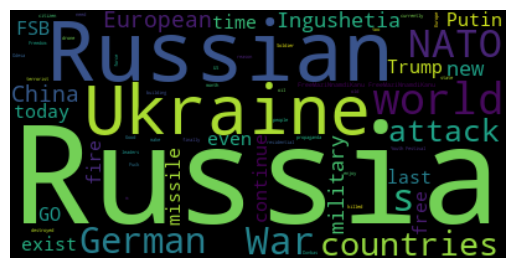

In [146]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [147]:
import seaborn as sns


In [148]:
df.groupby('segmentation').count()


,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,12,12,12,12
neutral,17,17,17,17
positive,25,25,25,25


<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

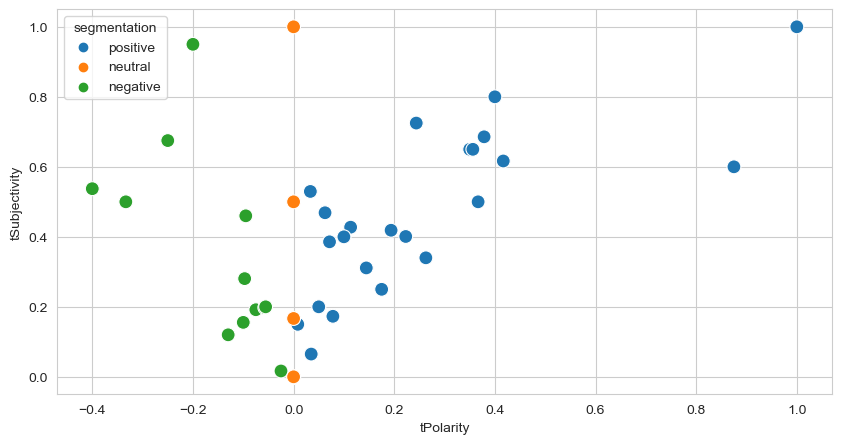

In [149]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')


<Axes: xlabel='segmentation', ylabel='count'>

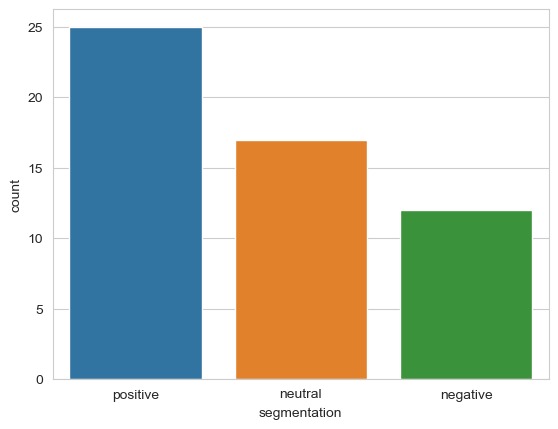

In [150]:
sns.countplot(data=df,x='segmentation')


In [151]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'response': ['positive', 'negative', 'neutral'], 'percentage':[positive, negative, neutral]}
pd.DataFrame(response)

,response,percentage
0,positive,46.3
1,negative,22.2
2,neutral,31.5
